Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Unemployment in India.csv")


Saving Unemployment in India.csv to Unemployment in India.csv


Data Exploration

In [ ]:
print(df.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None


In [ ]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
df.shape

(768, 7)

Data Cleaning

In [ ]:
#Clean column names
df.columns = df.columns.str.strip()

In [ ]:
#Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
#Basic check
print("Columns:", df.columns)

Columns: Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


Data Visualization
1. Overall Unemployment Rate

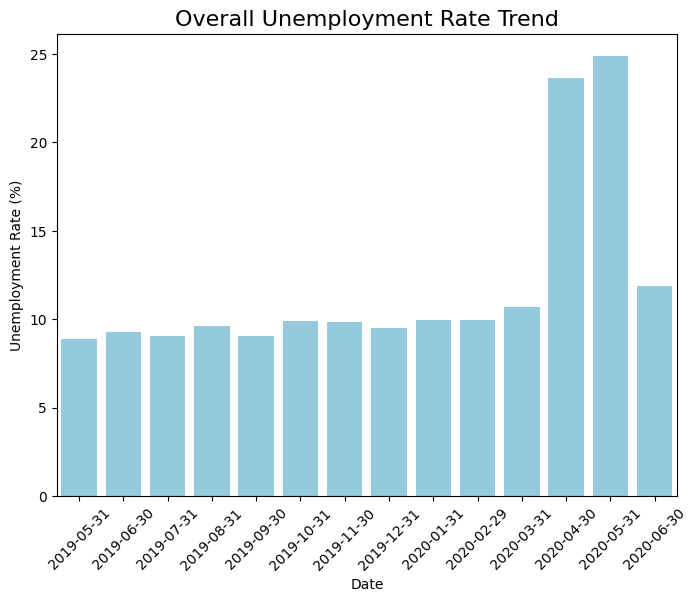

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="Date", y="Estimated Unemployment Rate (%)", ci=None, color="skyblue")
plt.title("Overall Unemployment Rate Trend", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)   # rotate dates for readability
plt.show()


2. Unemployment Trends: Rural vs Urban

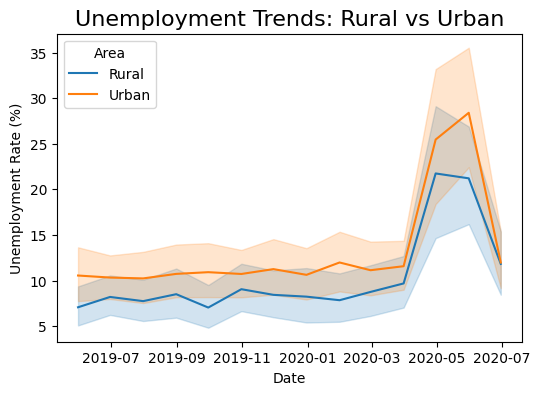

In [ ]:
# Rural vs Urban
plt.figure(figsize=(6,4))
sns.lineplot(data=df, x="Date", y="Estimated Unemployment Rate (%)", hue="Area")
plt.title("Unemployment Trends: Rural vs Urban", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()

3. Average Unemployment Rate by Region

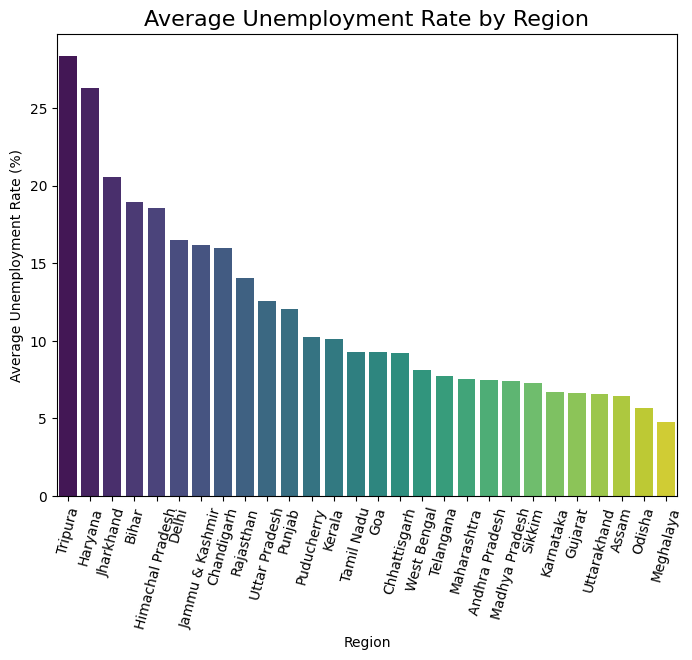

In [ ]:
# Regional averages
region_avg = df.groupby("Region")["Estimated Unemployment Rate (%)"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=region_avg.index, y=region_avg.values, palette="viridis")
plt.xticks(rotation=75)
plt.title("Average Unemployment Rate by Region", fontsize=16)
plt.ylabel("Average Unemployment Rate (%)")
plt.show()

Covid Impact Analysis

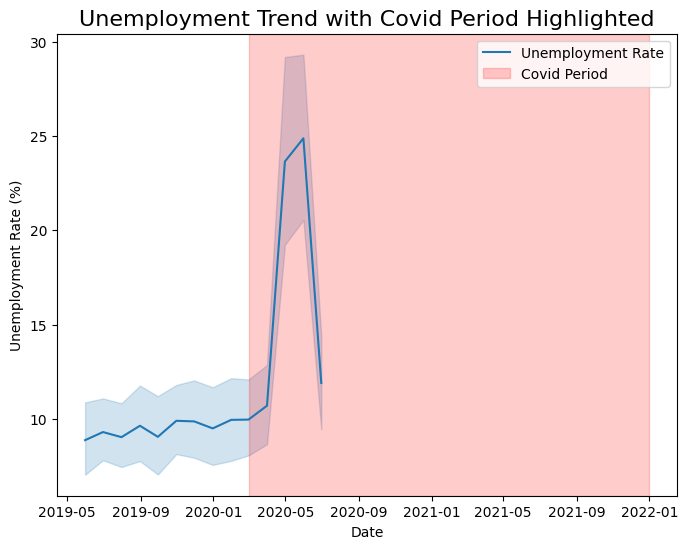

In [ ]:
# Define Covid period (2020-2021)
df['Year'] = df['Date'].dt.year
covid_period = df[(df['Year'] >= 2020) & (df['Year'] <= 2021)]
pre_covid = df[df['Year'] < 2020]
post_covid = df[df['Year'] > 2021]

# Trend highlighting Covid years
plt.figure(figsize=(6,4))
sns.lineplot(data=df, x="Date", y="Estimated Unemployment Rate (%)", label="Unemployment Rate")
plt.axvspan(pd.to_datetime("2020-03-01"), pd.to_datetime("2021-12-31"), color="red", alpha=0.2, label="Covid Period")
plt.title("Unemployment Trend with Covid Period Highlighted", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()

Average unemployment before, during, after Covid

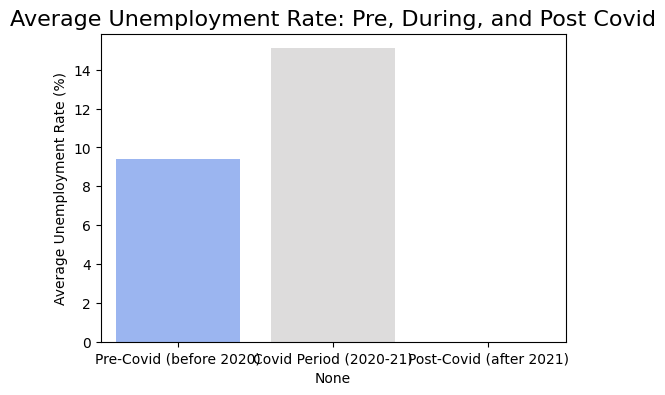

In [ ]:
period_avg = pd.DataFrame({
    "Pre-Covid (before 2020)" : [pre_covid["Estimated Unemployment Rate (%)"].mean()],
    "Covid Period (2020-21)" : [covid_period["Estimated Unemployment Rate (%)"].mean()],
    "Post-Covid (after 2021)" : [post_covid["Estimated Unemployment Rate (%)"].mean()]
}).T

plt.figure(figsize=(6,4))
sns.barplot(x=period_avg.index, y=period_avg[0], palette="coolwarm")
plt.title("Average Unemployment Rate: Pre, During, and Post Covid", fontsize=16)
plt.ylabel("Average Unemployment Rate (%)")
plt.show()

  Key Insights

In [ ]:
print("\nKey Insights:")
print("1. Unemployment spiked significantly in 2020 compared to other years.")
print("2. Rural and urban differences are visible in many states, with urban areas more impacted.")
print("3. After 2021, unemployment trends start to stabilize but remain higher than pre-Covid averages in some regions.")
print("4. States like Haryana, Jharkhand, and Tripura faced consistently high unemployment.")
print("5. This analysis can help policymakers target employment programs during crisis months and support vulnerable regions.")


Key Insights:
1. Unemployment spiked significantly in 2020 compared to other years.
2. Rural and urban differences are visible in many states, with urban areas more impacted.
3. After 2021, unemployment trends start to stabilize but remain higher than pre-Covid averages in some regions.
4. States like Haryana, Jharkhand, and Tripura faced consistently high unemployment.
5. This analysis can help policymakers target employment programs during crisis months and support vulnerable regions.
